## NIM : E12.2022.01684
## NAMA : Ariq Rasya Eka Maulana

In [1]:
import sys

sys.path.append('D:\\kuliah\\folder kuliah_AriqRasyaEkaMaulana\\ProKom_Ariq\\DM&BD')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_row", None)

In [4]:
dataset =pd.read_csv('D:\\kuliah\\folder kuliah_AriqRasyaEkaMaulana\\ProKom_Ariq\\DM&BD\\cirrhosis.csv', sep=',')

In [5]:
dataset = dataset.drop('ID',axis=1)

In [6]:
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [8]:
dataset.replace("NA", np.nan, inplace= True)
dataset.replace("nan", np.nan, inplace= True)
dataset.replace("NaN", np.nan, inplace= True)

In [9]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Drug             25.358852
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Cholesterol      32.057416
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [10]:
dataset = dataset.drop_duplicates()

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [12]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

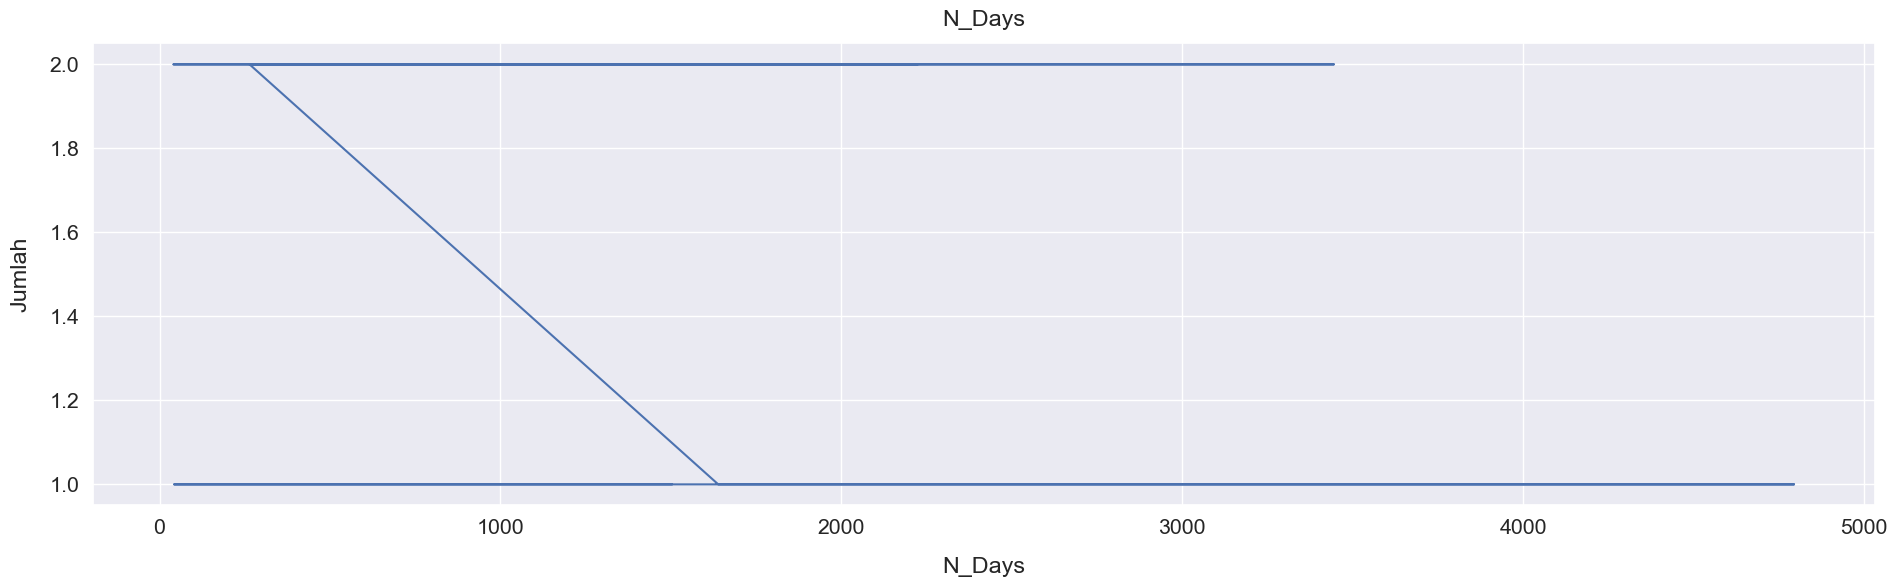

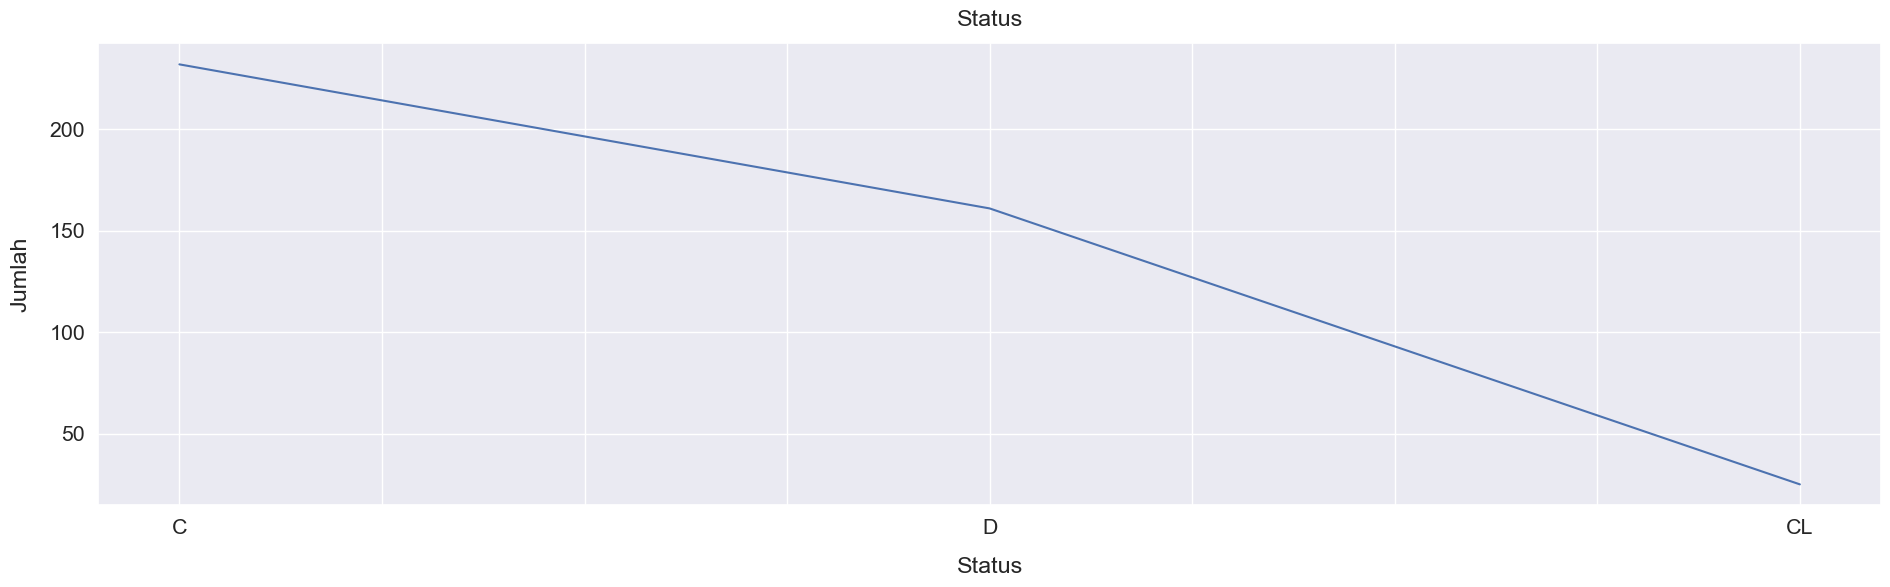

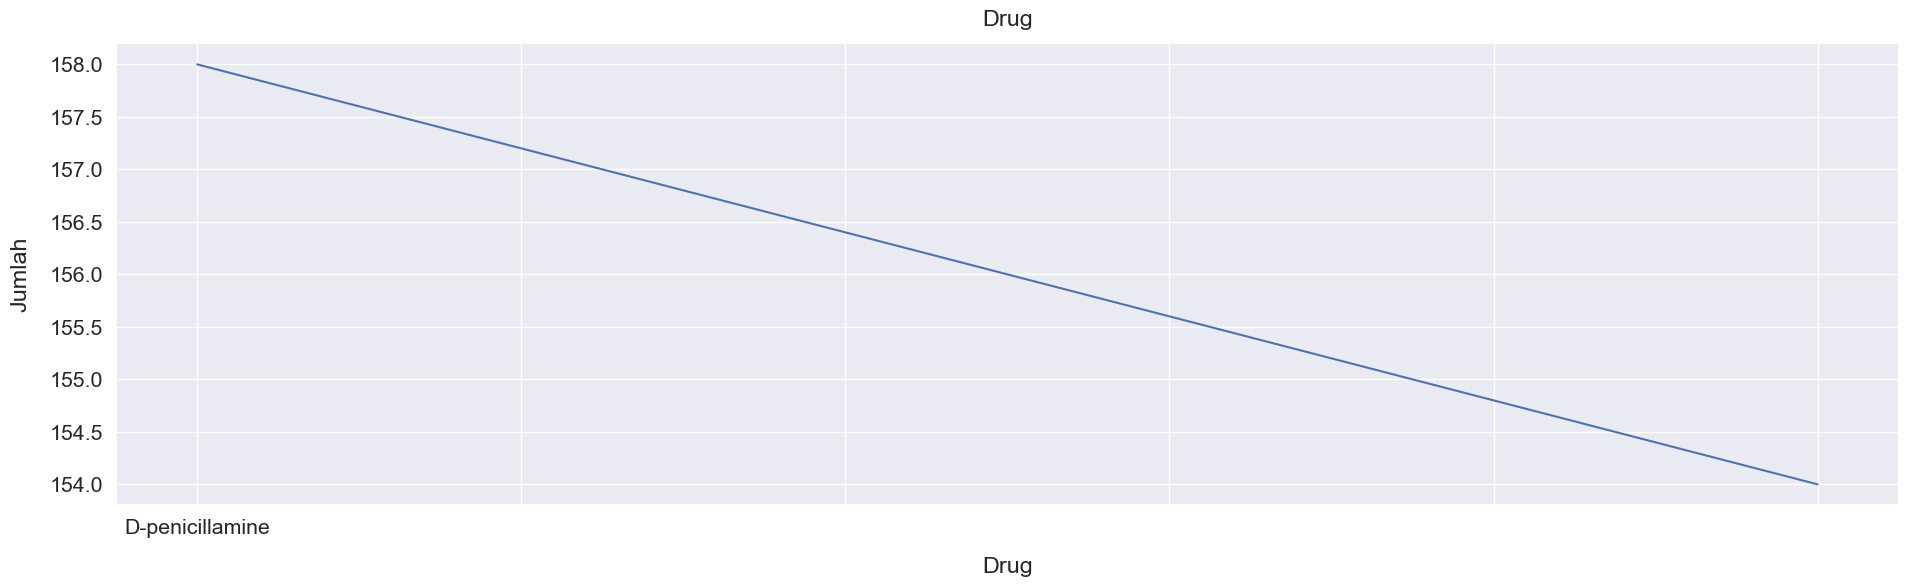

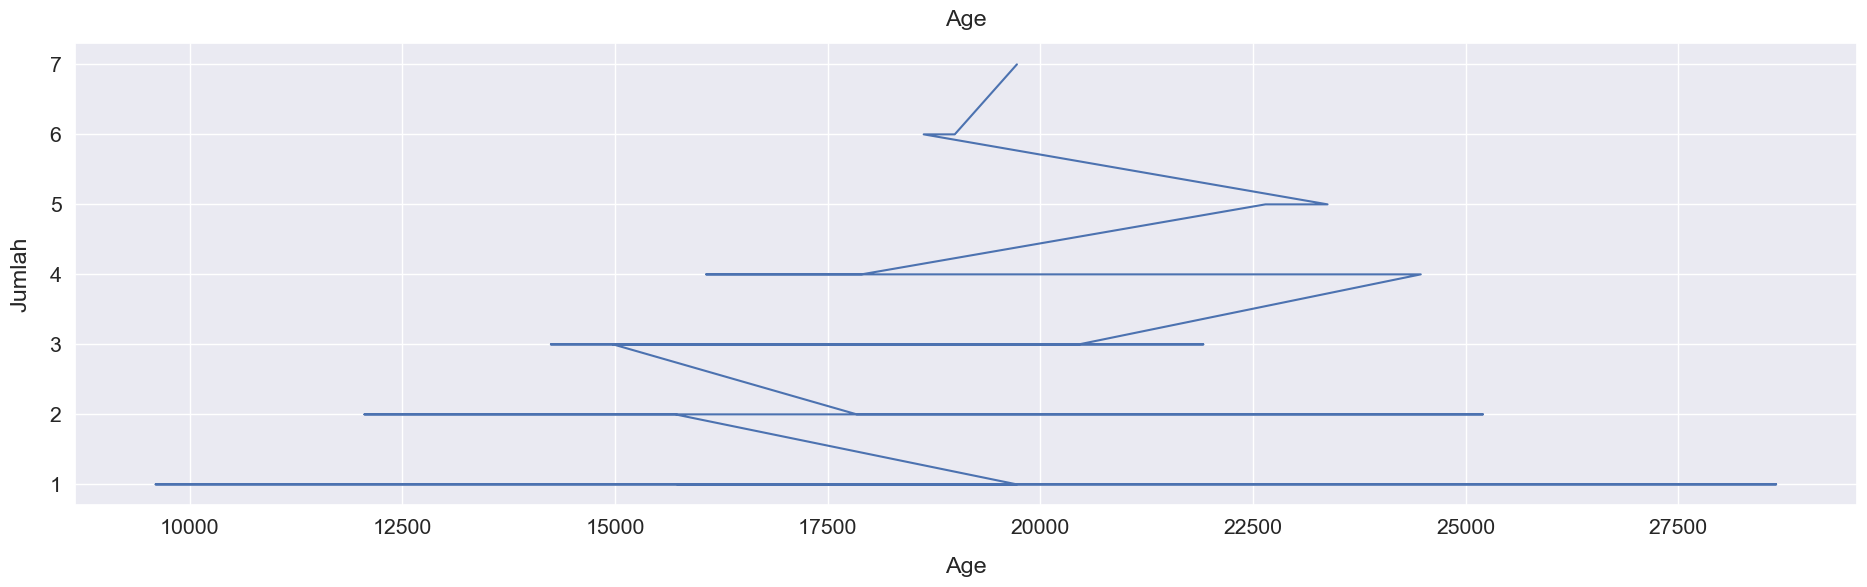

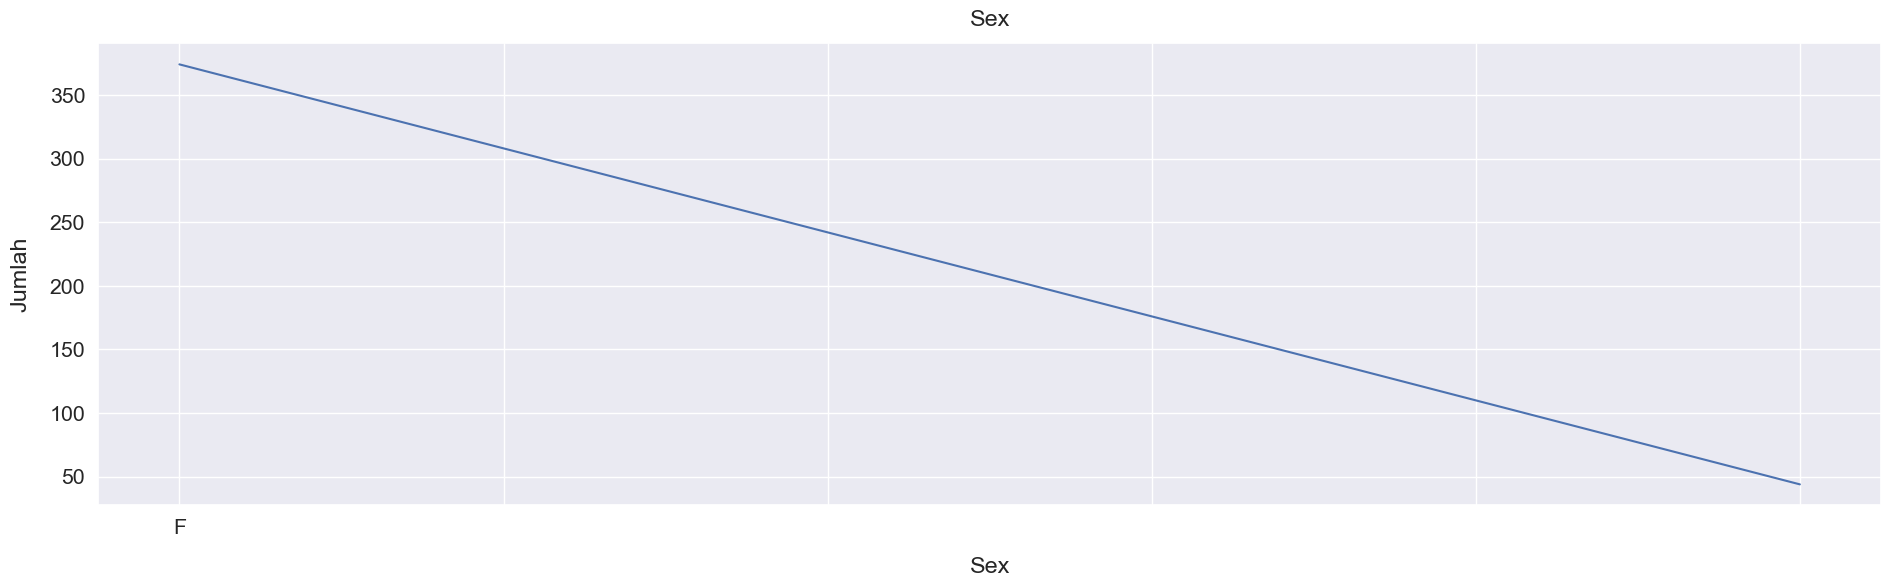

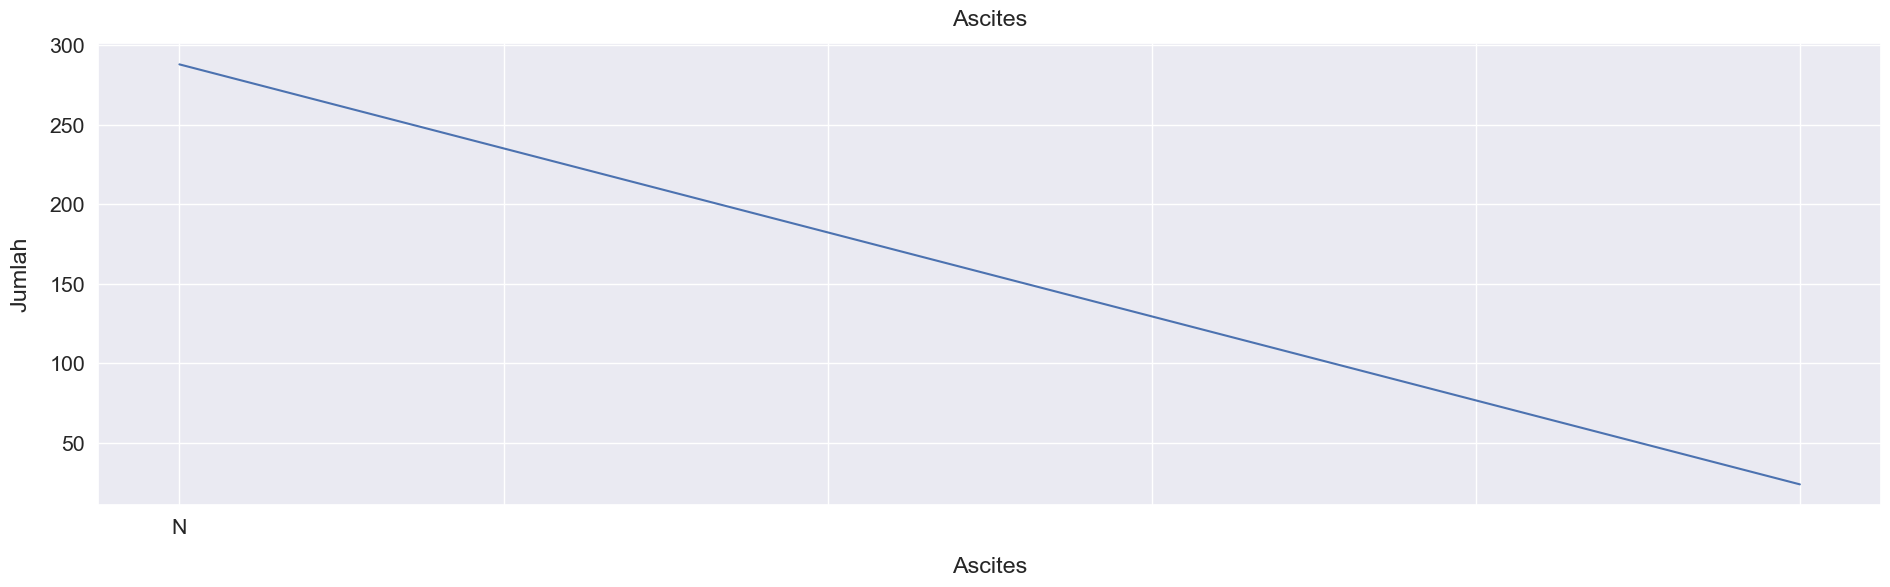

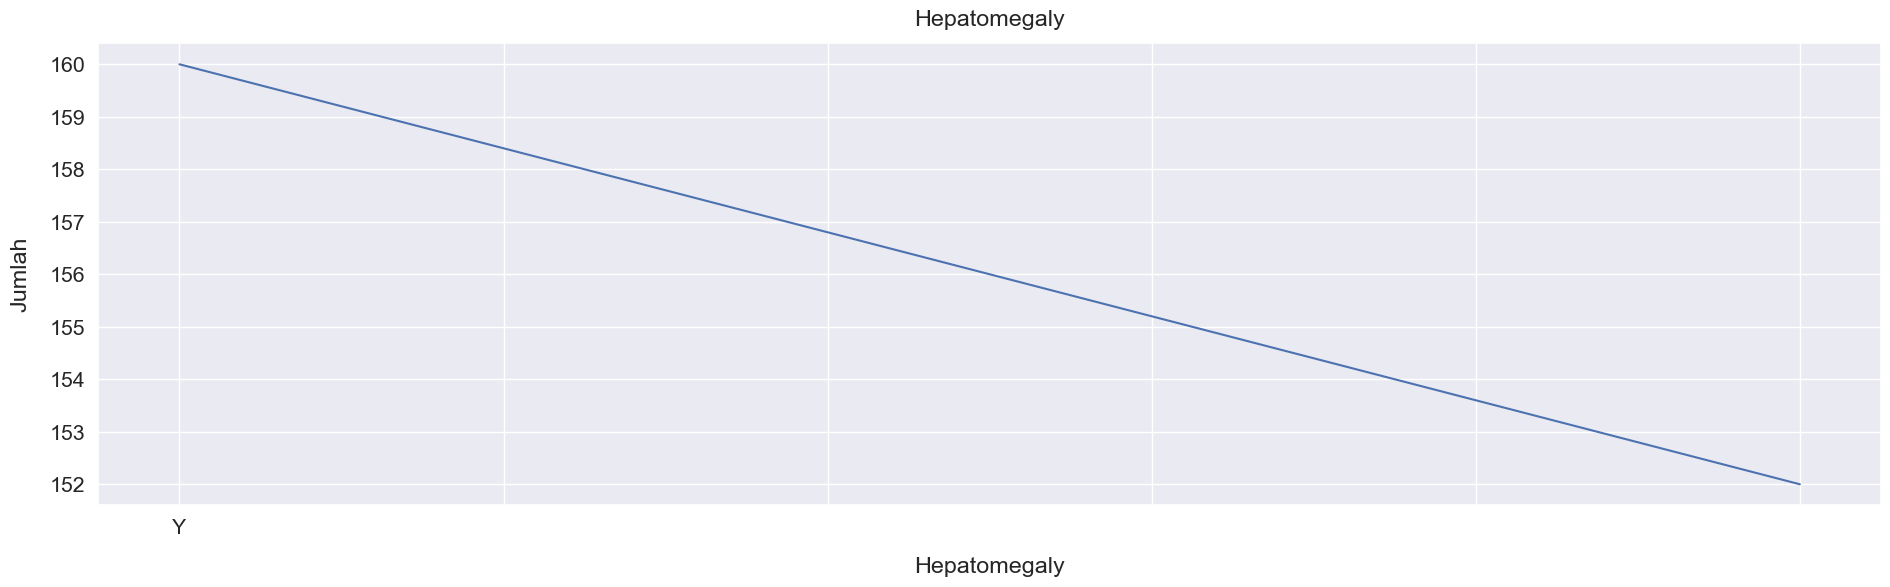

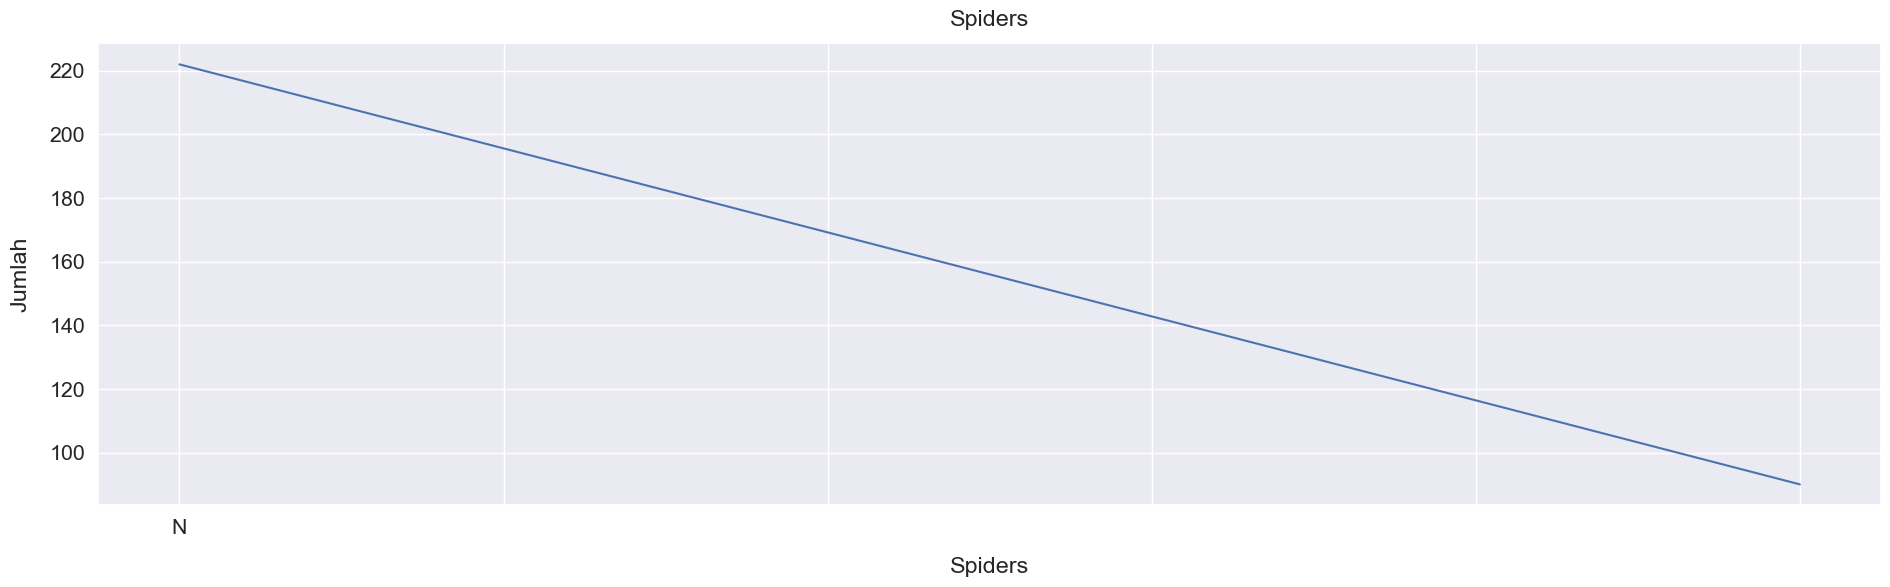

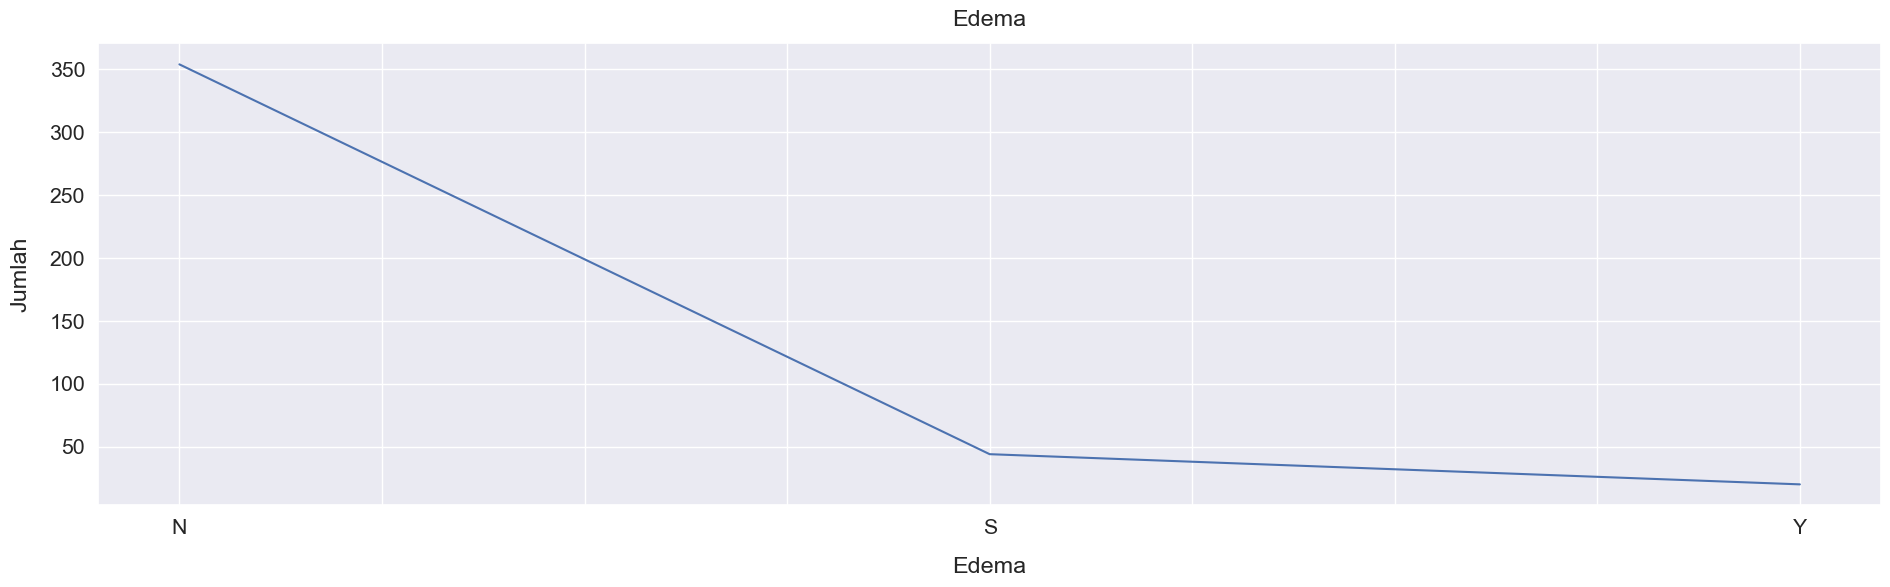

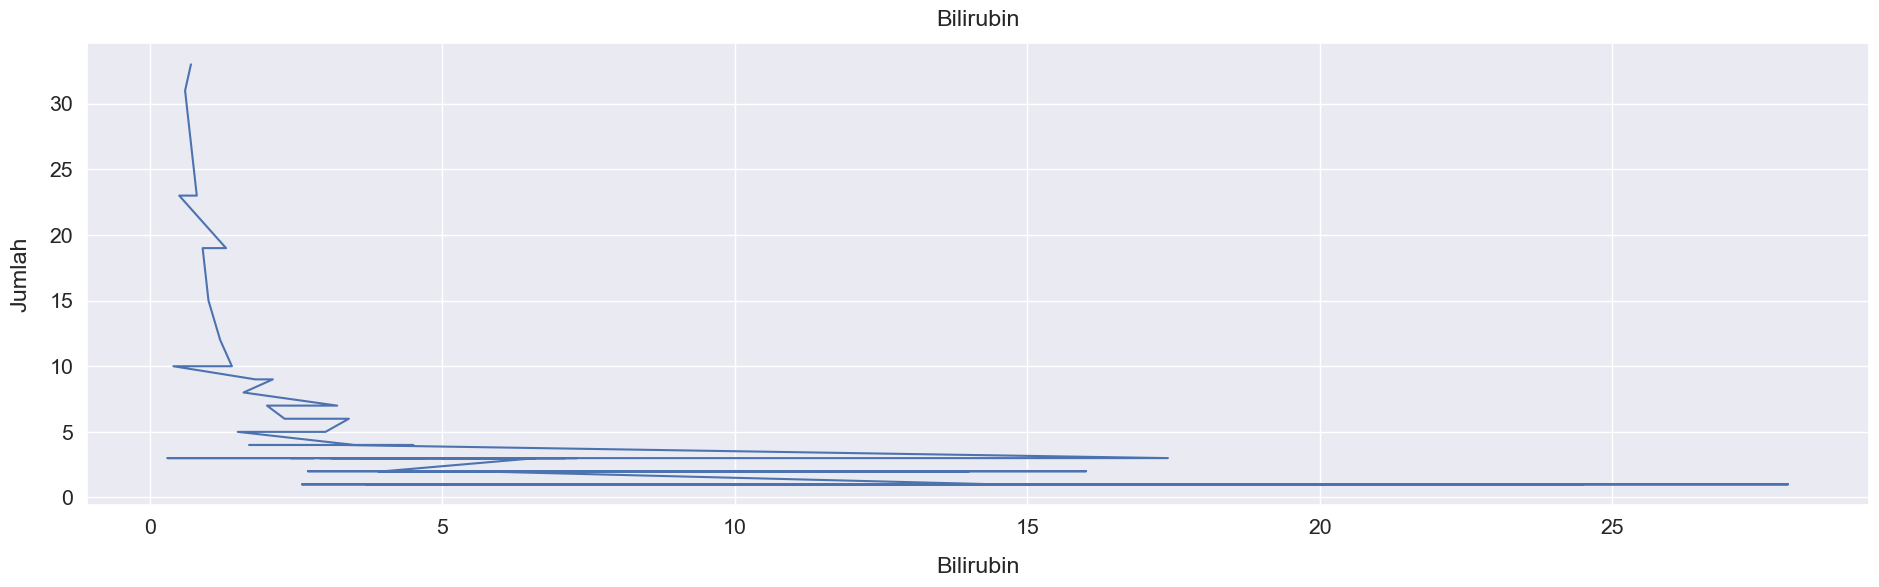

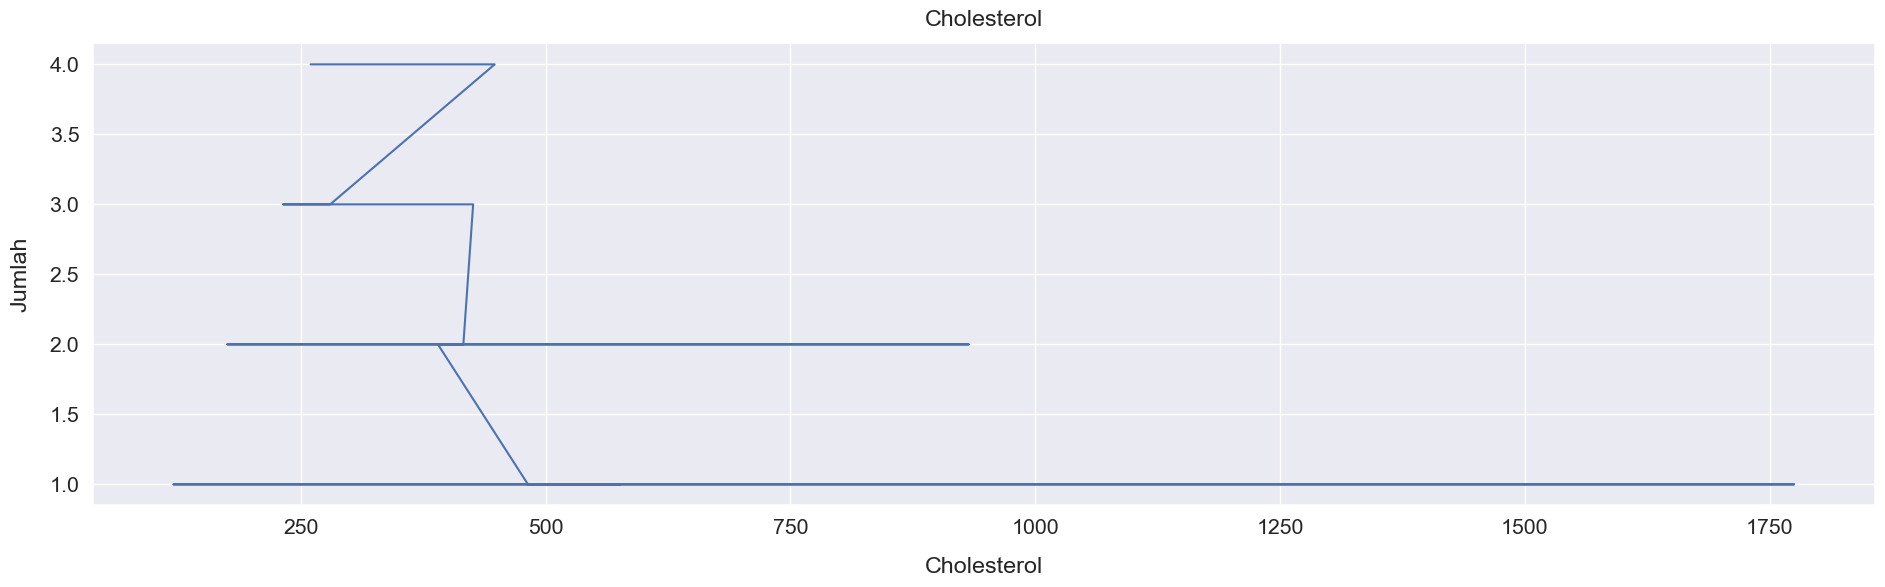

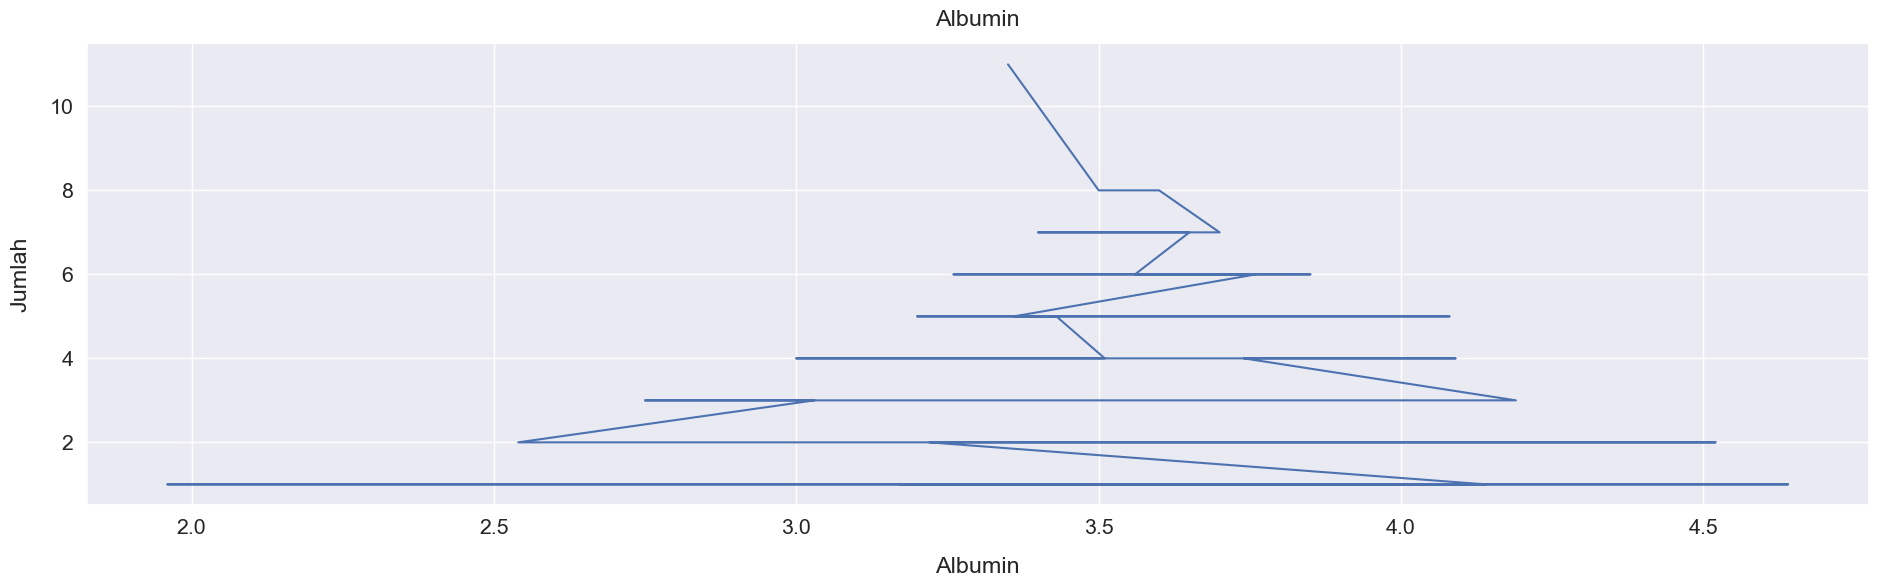

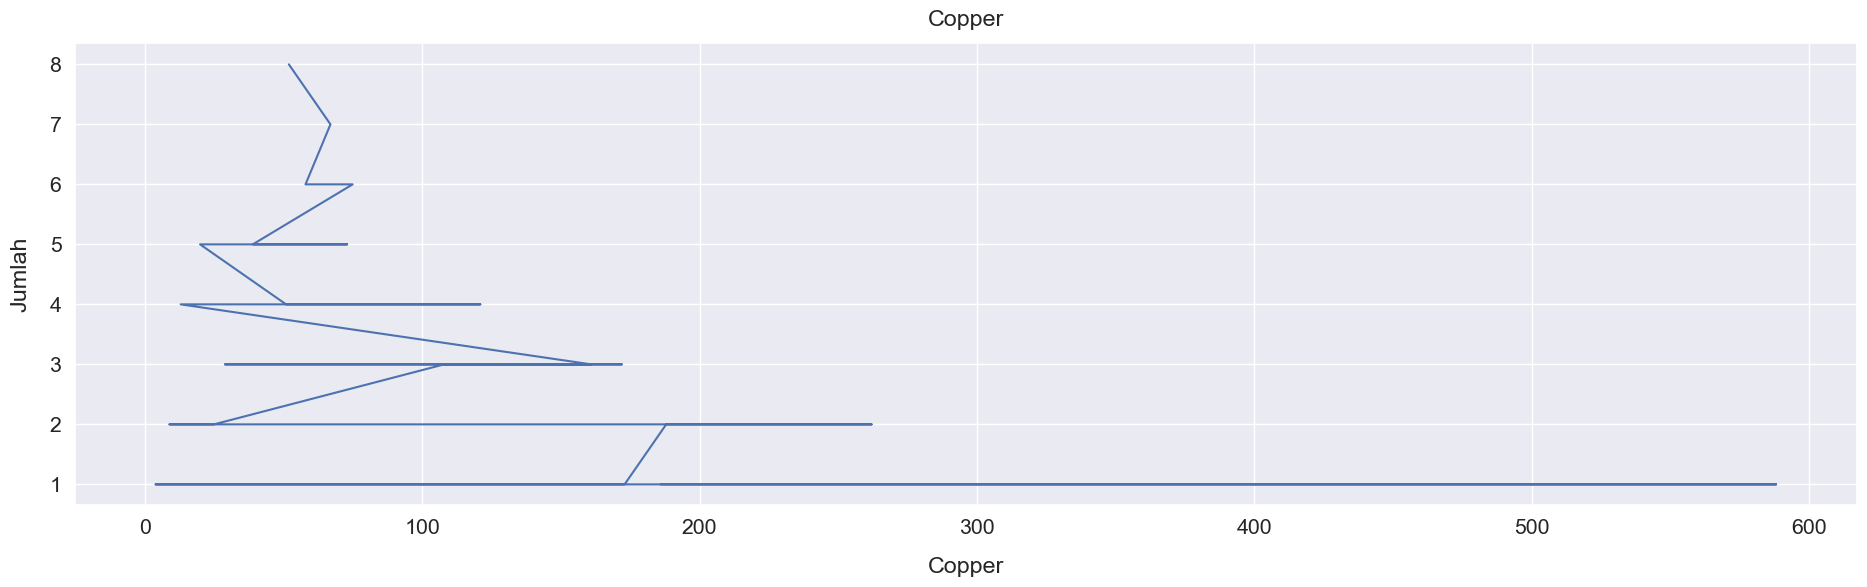

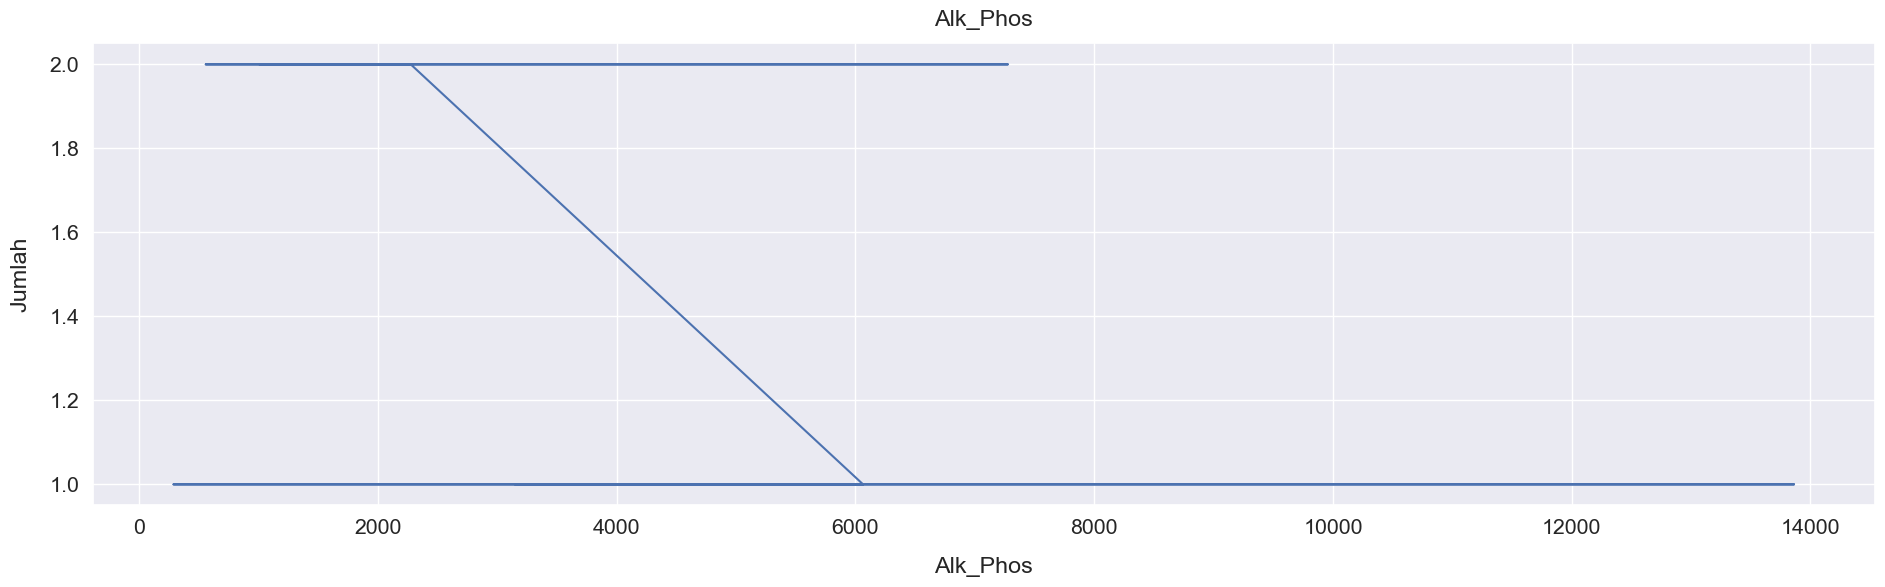

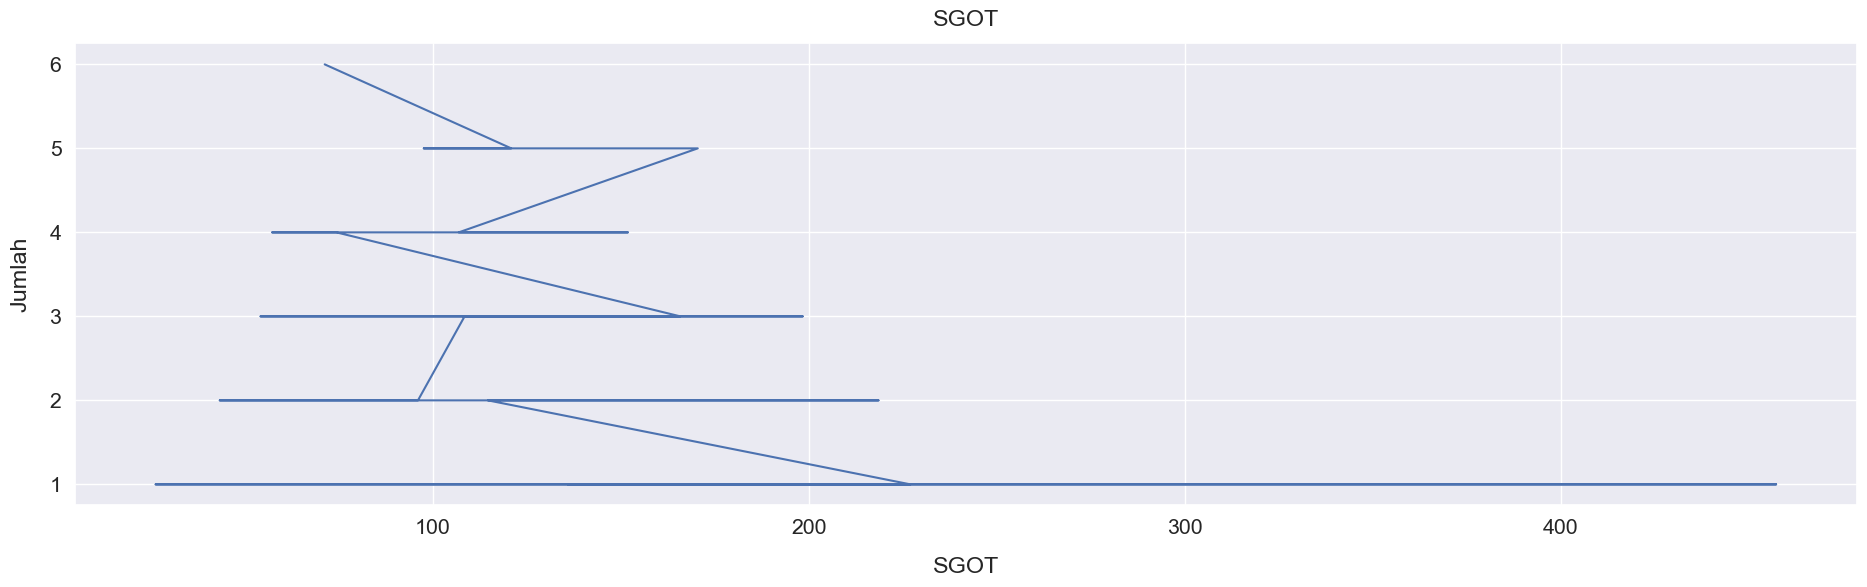

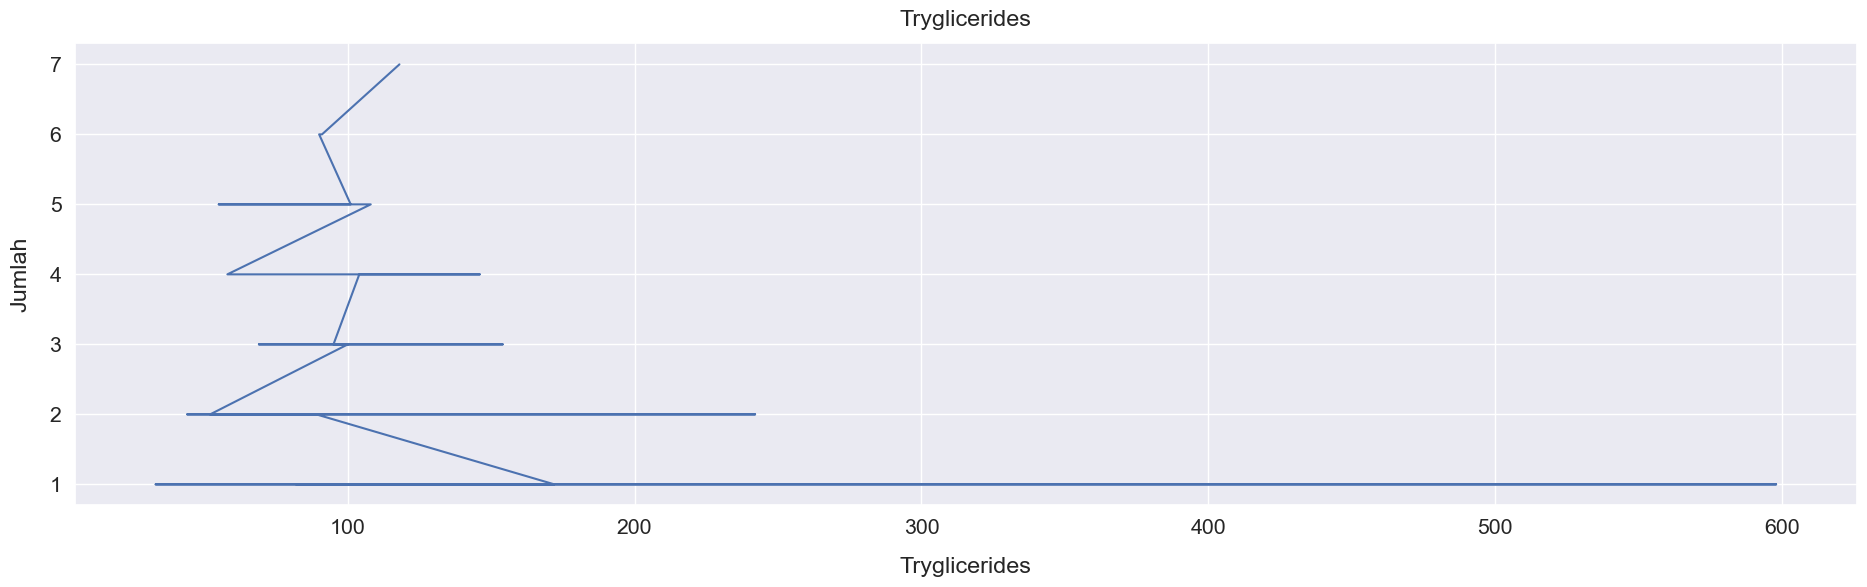

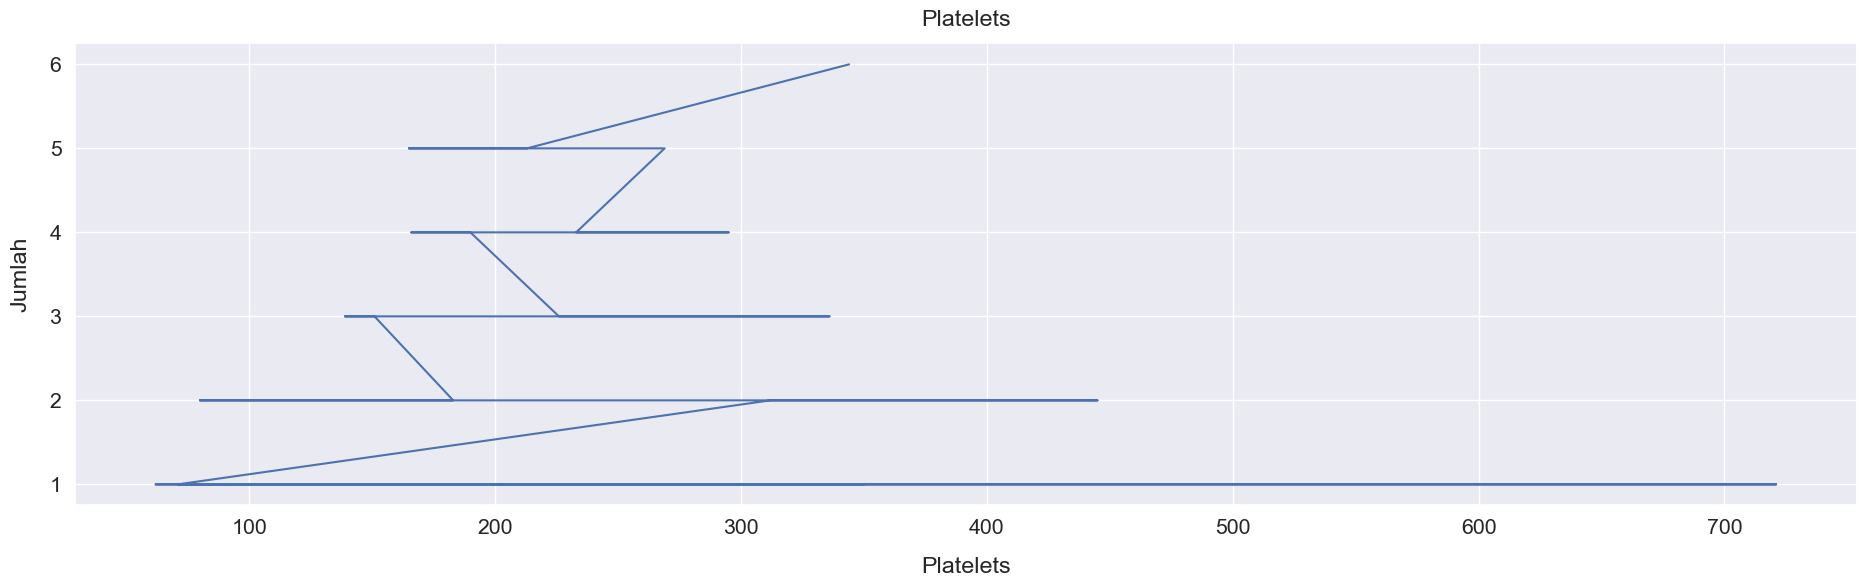

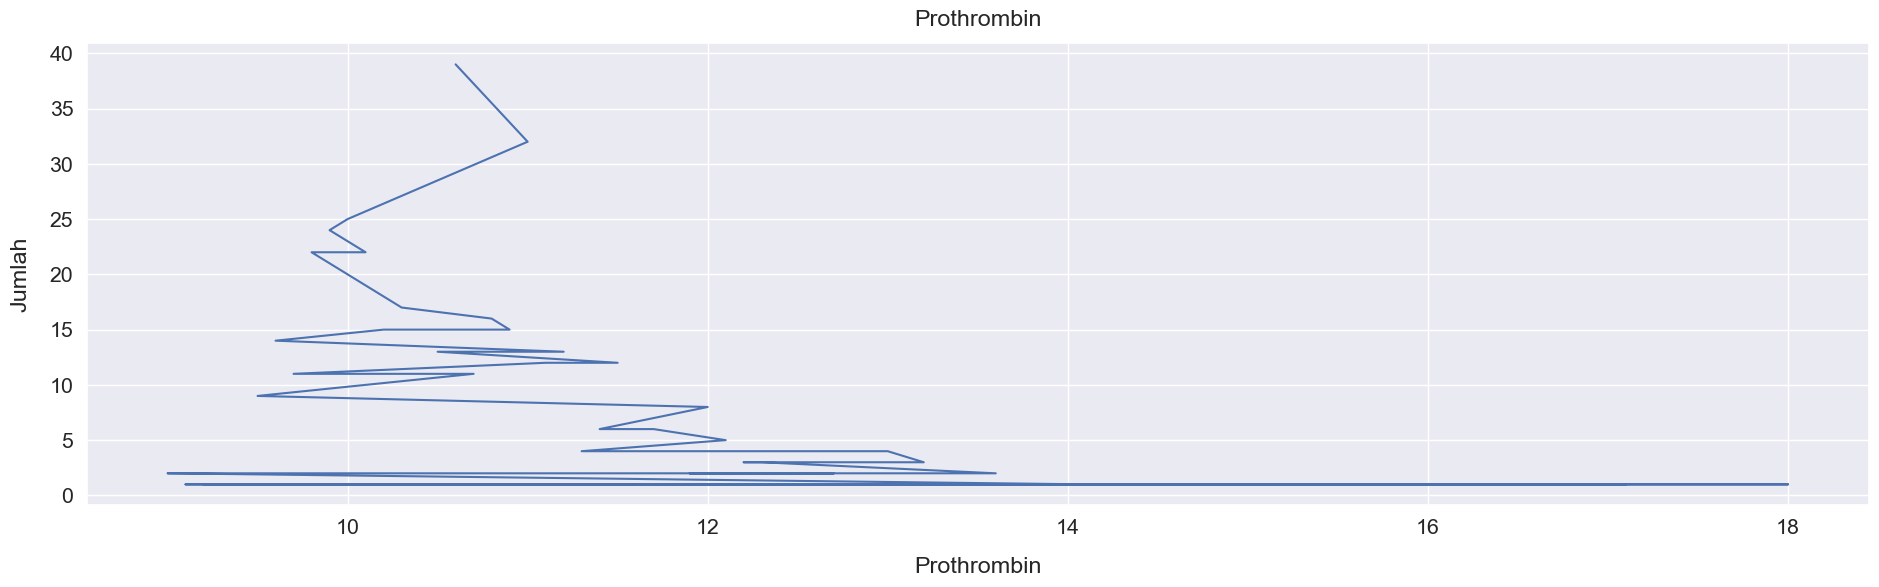

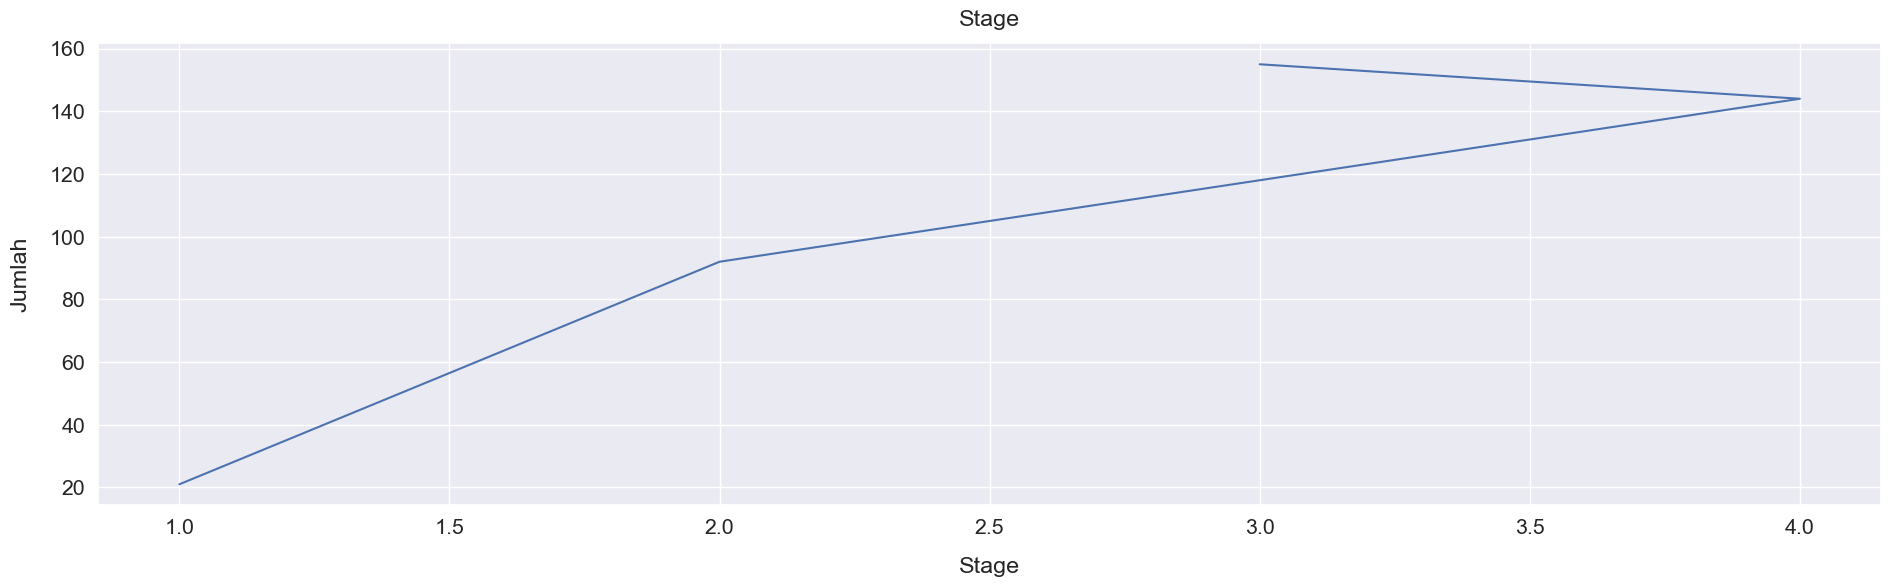

In [14]:
sns.set(font_scale=1.4)
for col in dataset.columns:
  dataset[col].value_counts().plot(kind='line', figsize=(23, 6), rot=0)
  plt.xlabel(col, labelpad=14)
  plt.ylabel("Jumlah", labelpad=14)
  plt.title(col, y=1.02);
  plt.show()

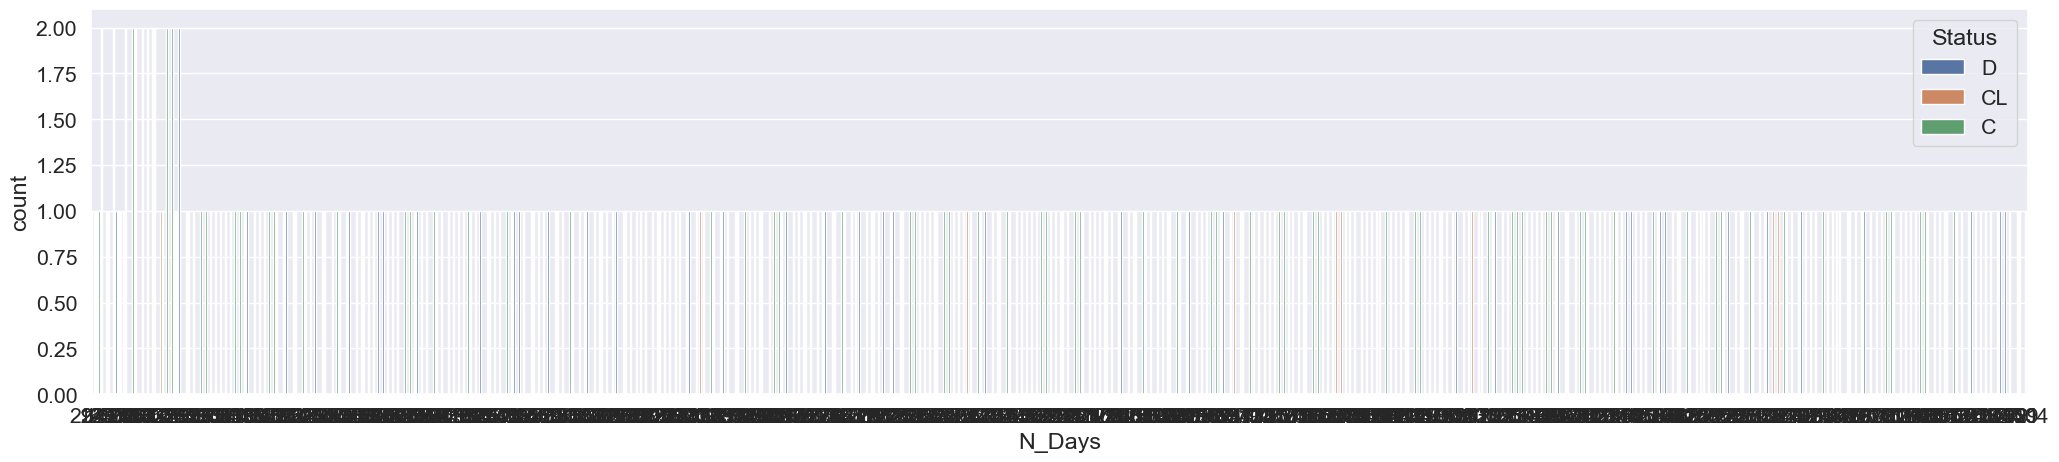

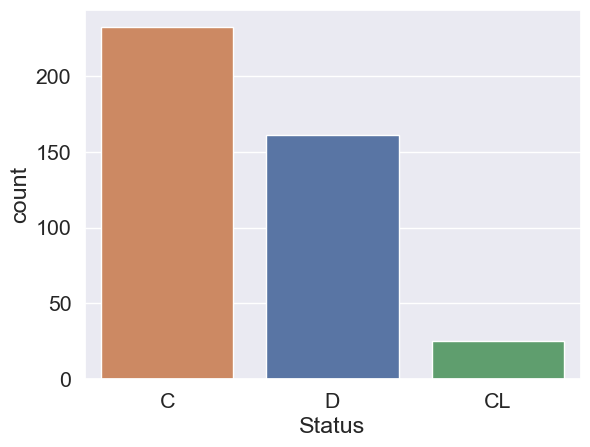

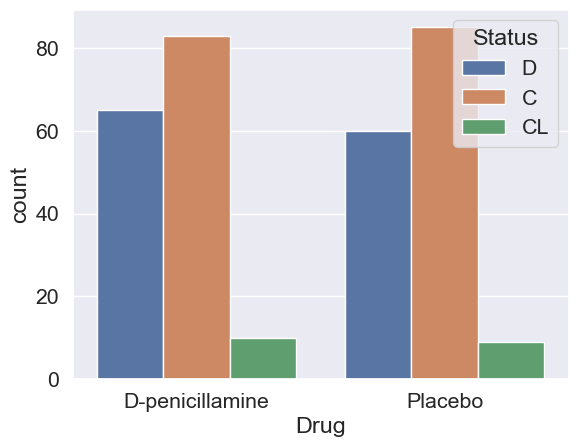

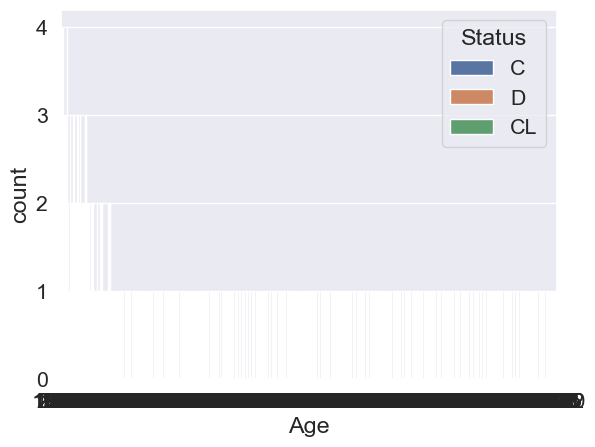

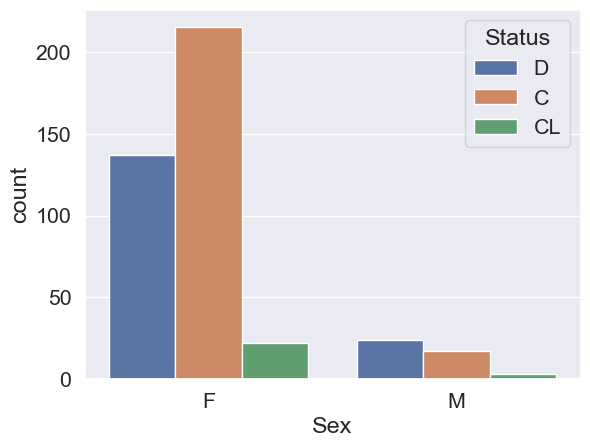

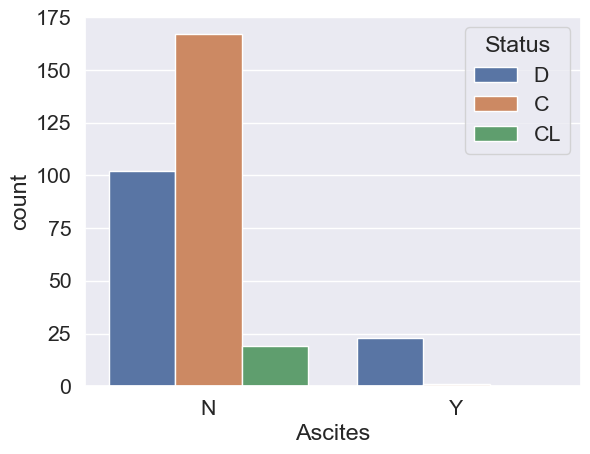

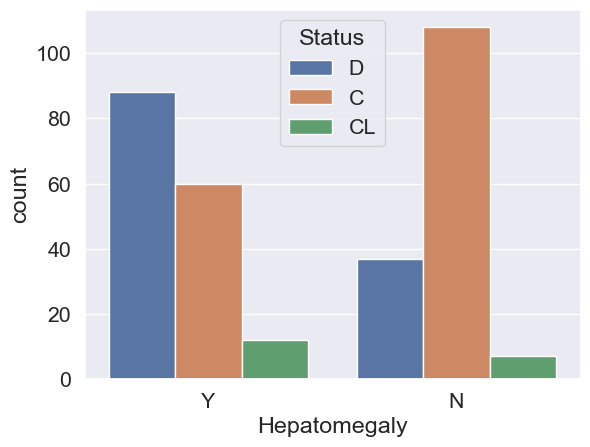

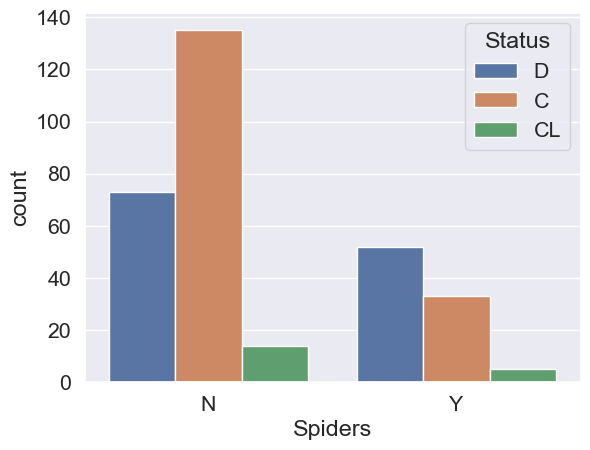

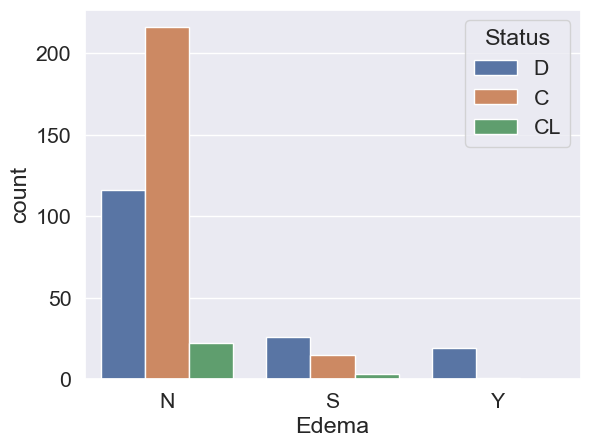

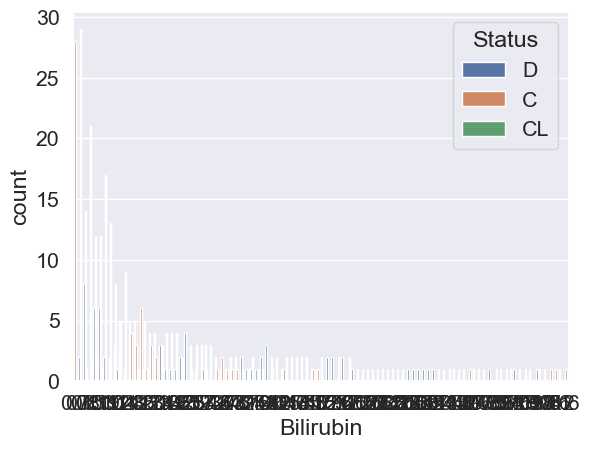

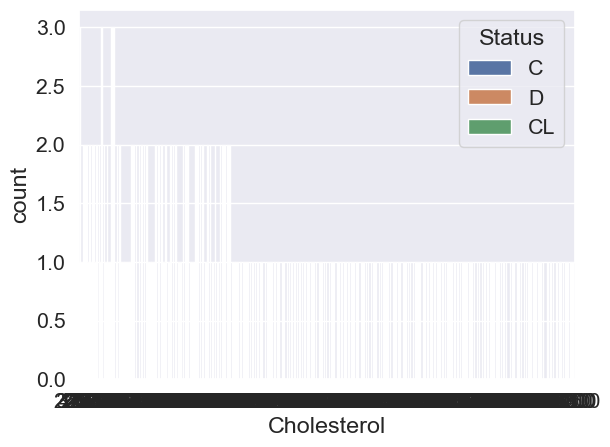

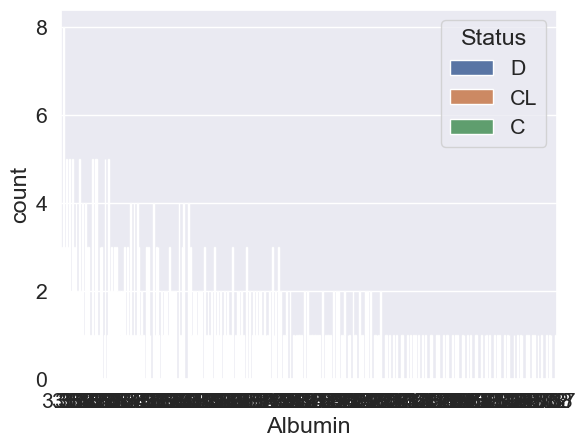

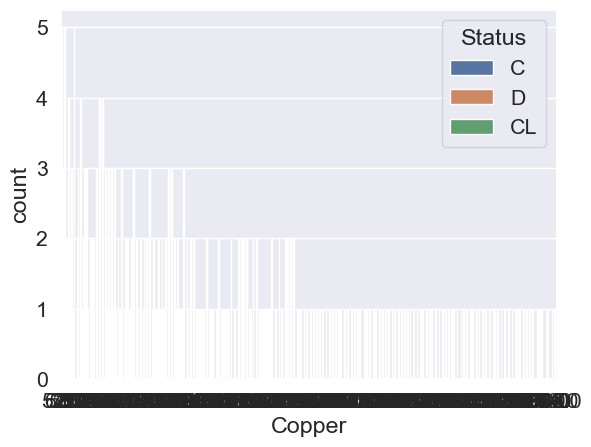

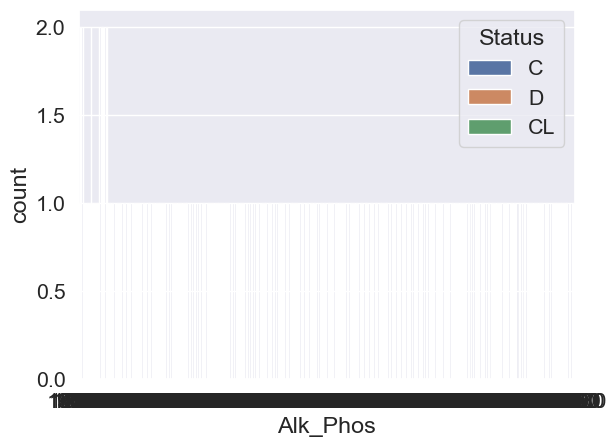

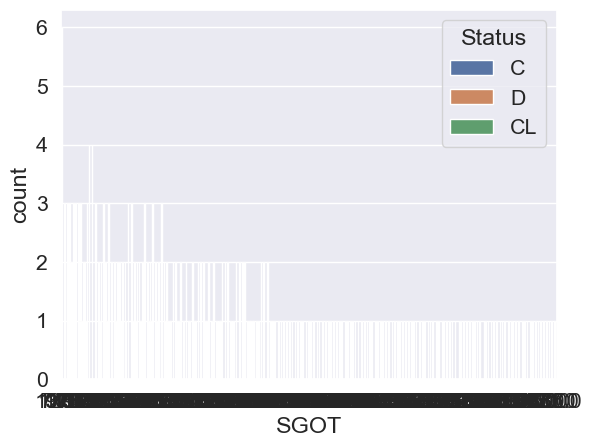

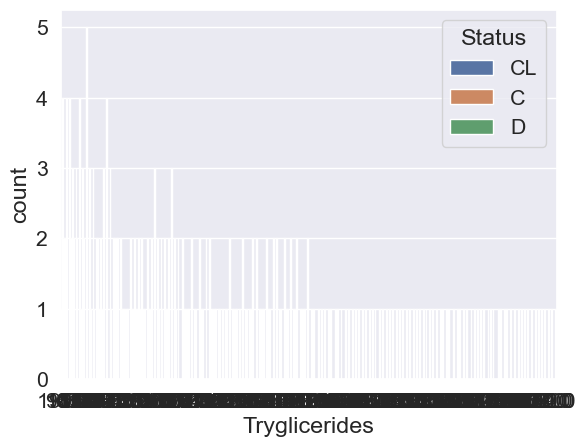

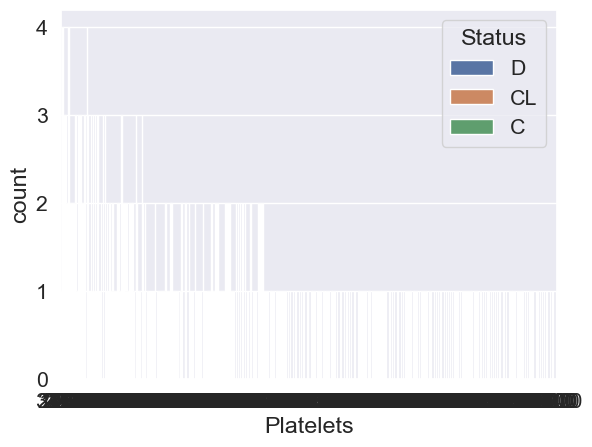

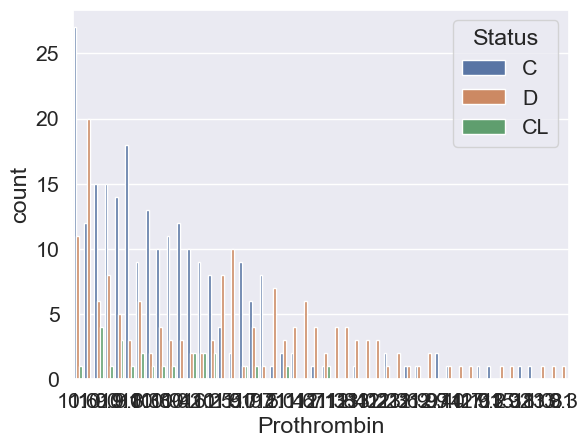

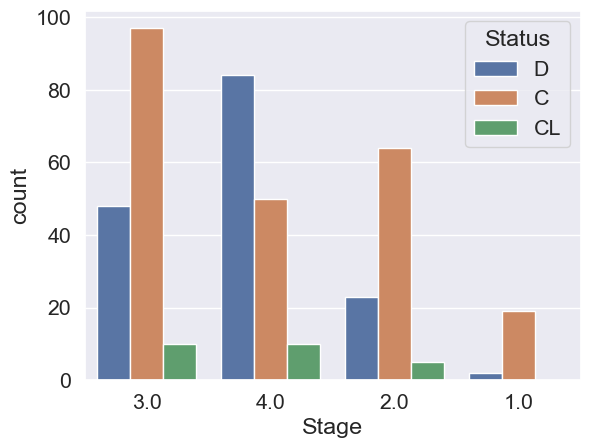

In [15]:
plt.subplots(figsize = (25,5))

for col in dataset.columns:
  sns.countplot(x=dataset[col],order=dataset[col].value_counts().index,hue=dataset['Status'])
  plt.show()

In [16]:
categorical_col = []
for column in dataset.columns:
  if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
    categorical_col.append(column)
    print(f"{column} : {dataset[column].unique()}")
    print("")

Status : ['D' 'C' 'CL']

Drug : ['D-penicillamine' 'Placebo' nan]

Sex : ['F' 'M']

Ascites : ['Y' 'N' nan]

Hepatomegaly : ['Y' 'N' nan]

Spiders : ['Y' 'N' nan]

Edema : ['Y' 'N' 'S']



In [17]:
Status       = {'D':1, 'C':2, 'CL':3}
Drug         = {'D-penicillamine':1, 'Placebo':2}
Sex          = {'F':1, 'M':2}
Ascites      = {'Y':1, 'N':2}
Hepatomegaly = {'Y':1, 'N':2}
Spiders      = {'Y':1, 'N':2}
Edema        = {'Y':1, 'N':2, 'S':3}

dataset['Status'] = dataset['Status'].map(Status)
dataset['Drug'] = dataset['Drug'].map(Drug)
dataset['Sex'] = dataset['Sex'].map(Sex)
dataset['Ascites'] = dataset['Ascites'].map(Ascites)
dataset['Hepatomegaly'] = dataset['Hepatomegaly'].map(Hepatomegaly)
dataset['Spiders'] = dataset['Spiders'].map(Spiders)
dataset['Edema'] = dataset['Edema'].map(Edema)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    int64  
 2   Drug           312 non-null    float64
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    int64  
 5   Ascites        312 non-null    float64
 6   Hepatomegaly   312 non-null    float64
 7   Spiders        312 non-null    float64
 8   Edema          418 non-null    int64  
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [19]:
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,1,1.0,21464,1,1.0,1.0,1.0,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,2,1.0,20617,1,2.0,1.0,1.0,2,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,1,1.0,25594,2,2.0,2.0,2.0,3,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,1,1.0,19994,1,2.0,1.0,1.0,3,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,3,2.0,13918,1,2.0,1.0,1.0,2,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,1,NaN,24472,1,NaN,NaN,NaN,2,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,2,NaN,14245,1,NaN,NaN,NaN,2,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,2,NaN,20819,1,NaN,NaN,NaN,2,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,2,NaN,21185,1,NaN,NaN,NaN,2,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [20]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [21]:
for column in dataset.columns:
    if pd.api.types.is_numeric_dtype(dataset[column]):
        dataset[column] = dataset[column].fillna(dataset[column].median())
    else:
        dataset.loc[:, dataset.isnull().any()].columns
dataset.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [22]:
#dataset.loc[:, dataset.isnull().any()].columns

In [23]:
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,1,1.0,21464,1,1.0,1.0,1.0,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,2,1.0,20617,1,2.0,1.0,1.0,2,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,1,1.0,25594,2,2.0,2.0,2.0,3,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,1,1.0,19994,1,2.0,1.0,1.0,3,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,3,2.0,13918,1,2.0,1.0,1.0,2,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,1,1.0,24472,1,2.0,1.0,2.0,2,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103,2,1.0,14245,1,2.0,1.0,2.0,2,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055,2,1.0,20819,1,2.0,1.0,2.0,2,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691,2,1.0,21185,1,2.0,1.0,2.0,2,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    int64  
 2   Drug           418 non-null    float64
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    int64  
 5   Ascites        418 non-null    float64
 6   Hepatomegaly   418 non-null    float64
 7   Spiders        418 non-null    float64
 8   Edema          418 non-null    int64  
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

In [25]:
dataset['N_Days'] = dataset['N_Days'].astype(np.int64).astype(float)
dataset['Status'] = dataset['Status'].astype(np.int64).astype(float)
#dataset['Drug'] = dataset['Drug'].astype(np.int64).astype(float)
dataset['Age'] = dataset['Age'].astype(np.int64).astype(float)
dataset['Sex'] = dataset['Sex'].astype(np.int64).astype(float)
#dataset['Ascites'] = dataset['Ascites'].astype(np.int64).astype(float)
#dataset['Hepatomegaly'] = dataset['Hepatomegaly'].astype(np.int64).astype(float)
#dataset['Spiders'] = dataset['Spiders'].astype(np.int64).astype(float)
dataset['Edema'] = dataset['Edema'].astype(np.int64).astype(float)
#dataset['Bilirubin'] = dataset['Bilirubin'].astype(float).astype(np.int64)
#dataset['Cholesterol'] = dataset['Cholesterol'].astype(float).astype(np.int64)
#dataset['Albumin'] = dataset['Albumin'].astype(float).astype(np.int64)
#dataset['Copper'] = dataset['Copper'].astype(float).astype(np.int64)
#dataset['Alk_Phos'] = dataset['Alk_Phos'].astype(float).astype(np.int64)
#dataset['SGOT'] = dataset['SGOT'].astype(float).astype(np.int64)
#dataset['Tryglicerides'] = dataset['Tryglicerides'].astype(float).astype(np.int64)
#dataset['Platelets'] = dataset['Platelets'].astype(float).astype(np.int64)
#dataset['Prothrombin'] = dataset['Prothrombin'].astype(float).astype(np.int64)
#dataset['Stage'] = dataset['Stage'].astype(float).astype(np.int64)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    float64
 1   Status         418 non-null    float64
 2   Drug           418 non-null    float64
 3   Age            418 non-null    float64
 4   Sex            418 non-null    float64
 5   Ascites        418 non-null    float64
 6   Hepatomegaly   418 non-null    float64
 7   Spiders        418 non-null    float64
 8   Edema          418 non-null    float64
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

In [27]:
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400.0,1.0,1.0,21464.0,1.0,1.0,1.0,1.0,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500.0,2.0,1.0,20617.0,1.0,2.0,1.0,1.0,2.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012.0,1.0,1.0,25594.0,2.0,2.0,2.0,2.0,3.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925.0,1.0,1.0,19994.0,1.0,2.0,1.0,1.0,3.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504.0,3.0,2.0,13918.0,1.0,2.0,1.0,1.0,2.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681.0,1.0,1.0,24472.0,1.0,2.0,1.0,2.0,2.0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103.0,2.0,1.0,14245.0,1.0,2.0,1.0,2.0,2.0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055.0,2.0,1.0,20819.0,1.0,2.0,1.0,2.0,2.0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691.0,2.0,1.0,21185.0,1.0,2.0,1.0,2.0,2.0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


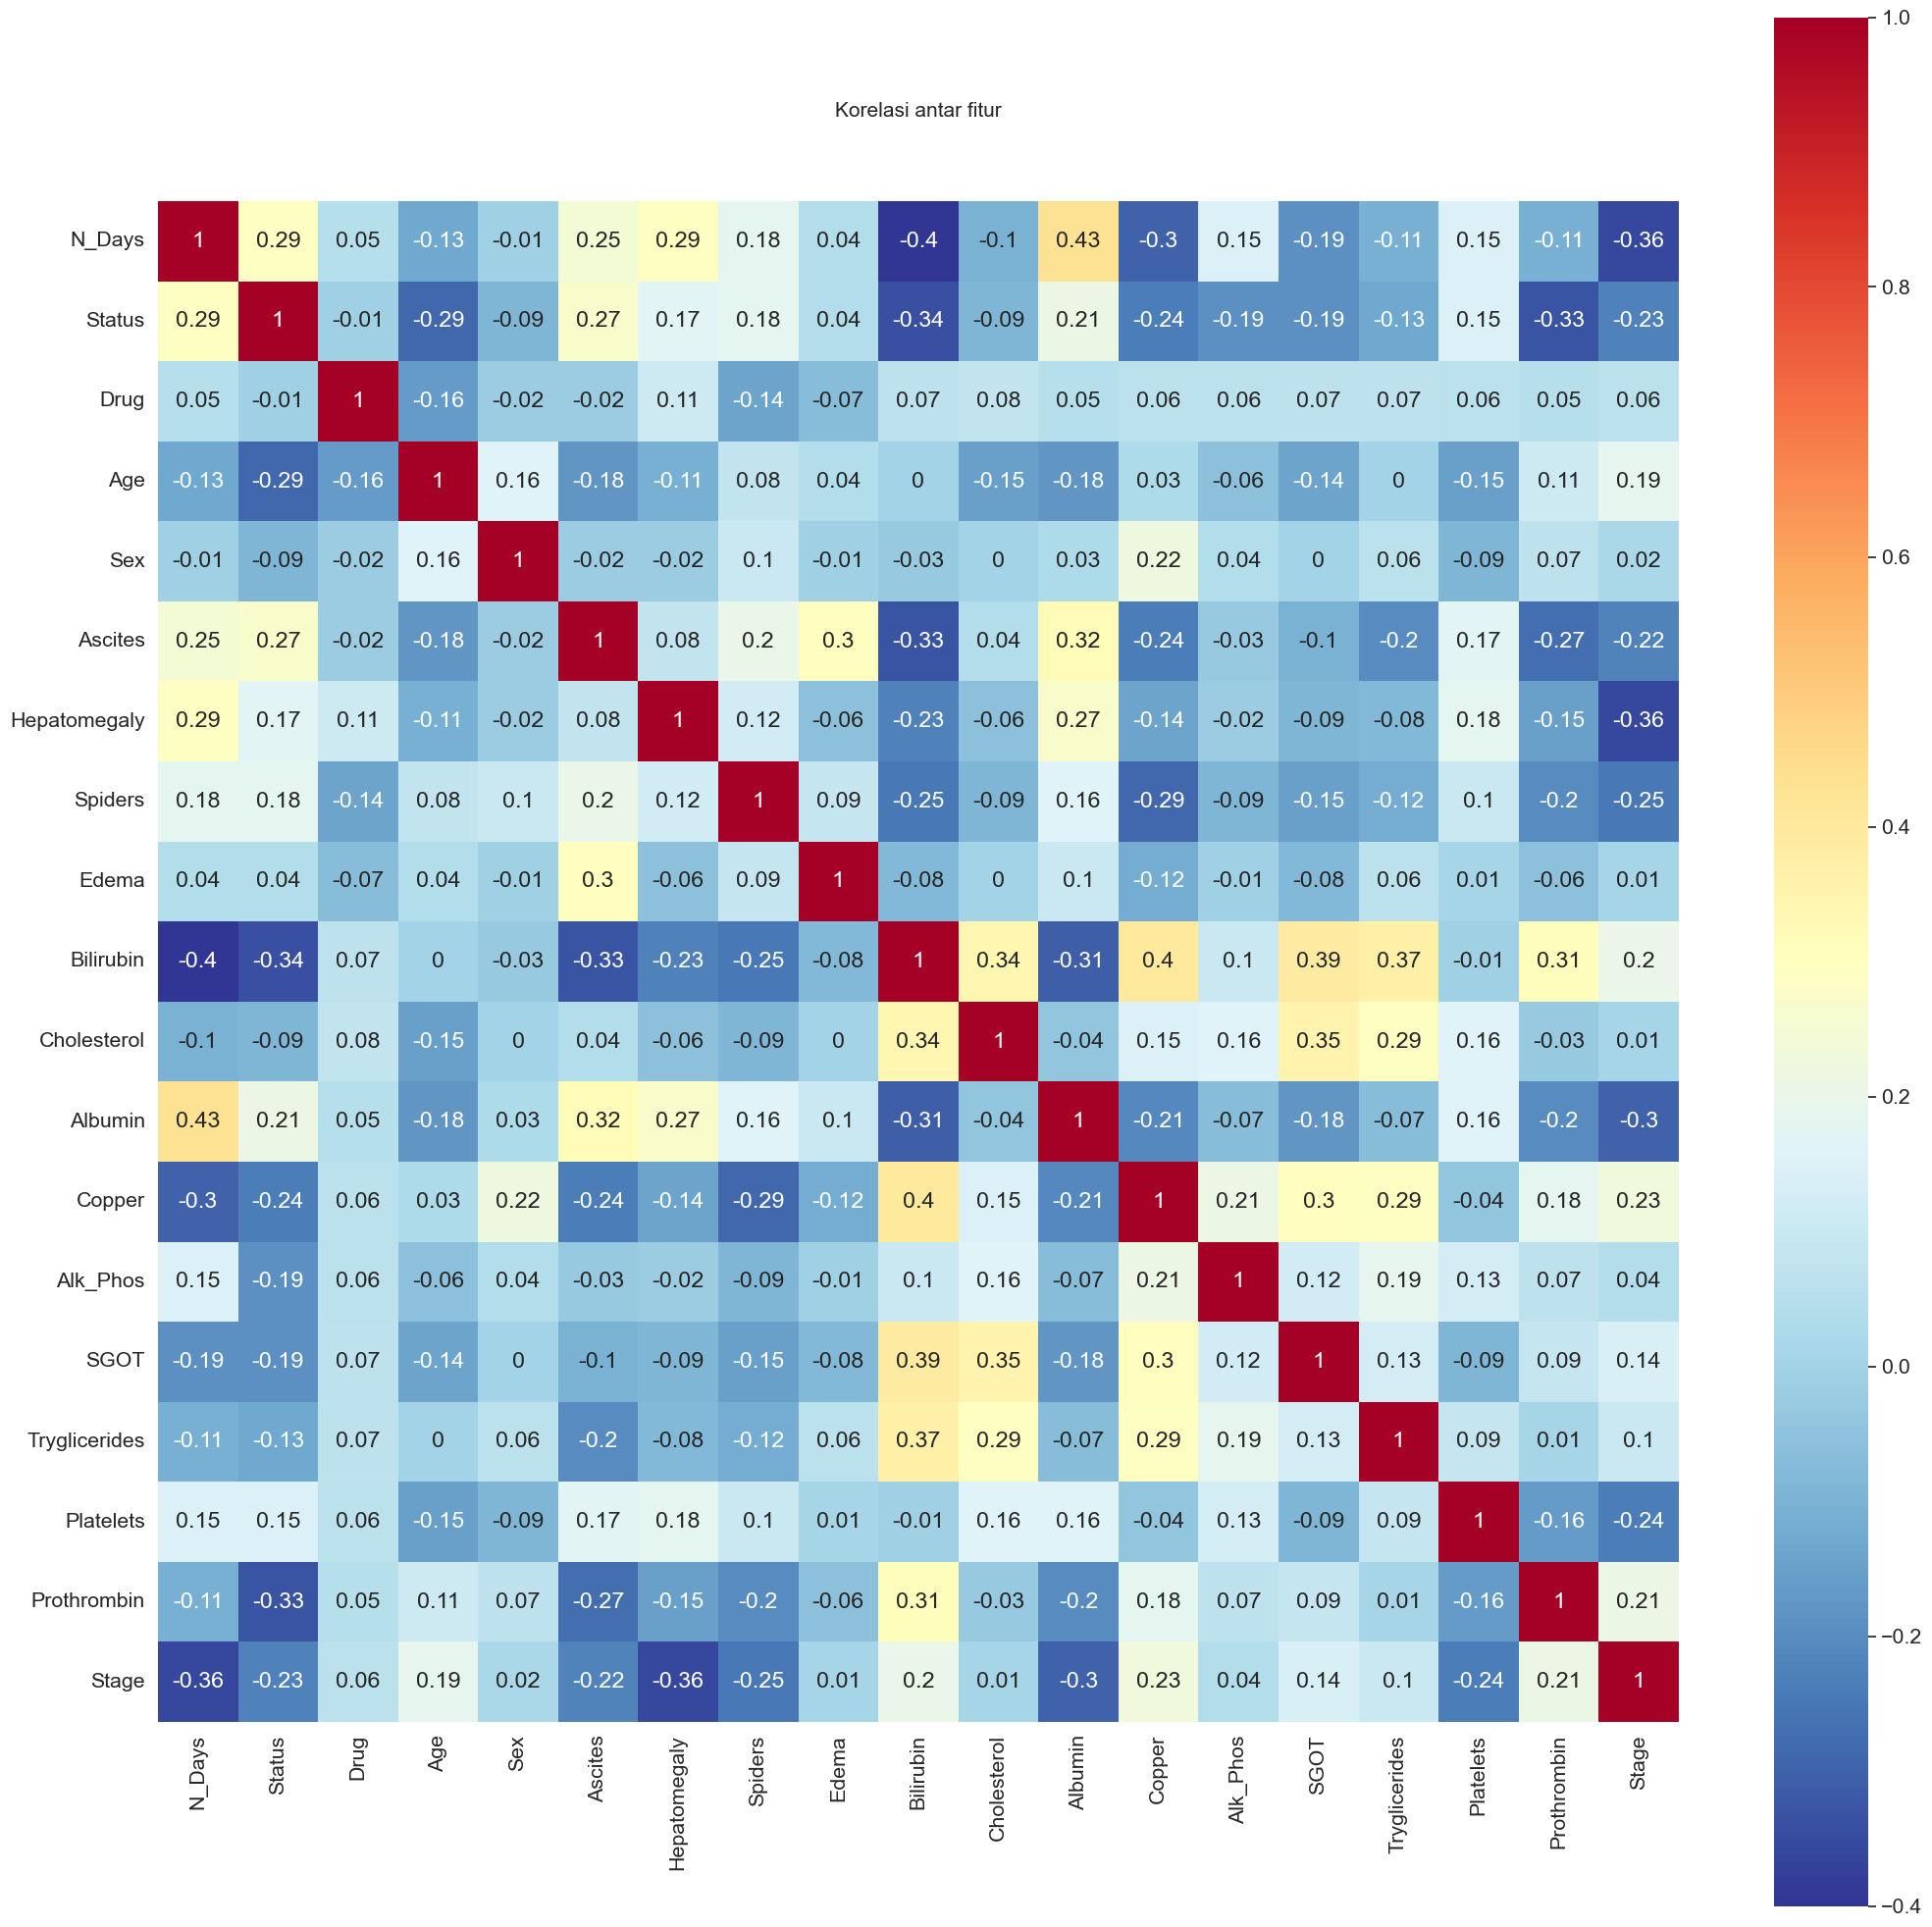

In [28]:
correlation = dataset.corr()
plt.subplots(figsize = (25,25))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlBu_r')
plt.title('Korelasi antar fitur', y=1.05, size=15)
plt.show()

In [29]:
X = dataset.drop(columns=['Status'])

In [30]:
X

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400.0,1.0,21464.0,1.0,1.0,1.0,1.0,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500.0,1.0,20617.0,1.0,2.0,1.0,1.0,2.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012.0,1.0,25594.0,2.0,2.0,2.0,2.0,3.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925.0,1.0,19994.0,1.0,2.0,1.0,1.0,3.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504.0,2.0,13918.0,1.0,2.0,1.0,1.0,2.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681.0,1.0,24472.0,1.0,2.0,1.0,2.0,2.0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103.0,1.0,14245.0,1.0,2.0,1.0,2.0,2.0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055.0,1.0,20819.0,1.0,2.0,1.0,2.0,2.0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691.0,1.0,21185.0,1.0,2.0,1.0,2.0,2.0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [31]:
Y = dataset['Status']

In [32]:
Y

0      1.0
1      2.0
2      1.0
3      1.0
4      3.0
      ... 
413    1.0
414    2.0
415    2.0
416    2.0
417    2.0
Name: Status, Length: 418, dtype: float64

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [34]:
X_test

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
321,2011.0,1.0,23376.0,1.0,2.0,1.0,2.0,2.0,1.1,309.5,3.69,73.0,1259.0,114.70,108.0,139.0,10.5,3.0
324,4795.0,1.0,12419.0,1.0,2.0,1.0,2.0,2.0,1.8,309.5,3.24,73.0,1259.0,114.70,108.0,251.0,18.0,2.0
388,1581.0,1.0,24472.0,1.0,2.0,1.0,2.0,2.0,0.7,309.5,3.06,73.0,1259.0,114.70,108.0,165.0,10.0,4.0
56,3282.0,1.0,19567.0,1.0,2.0,1.0,2.0,3.0,2.3,260.0,3.18,231.0,11320.2,105.78,94.0,216.0,12.4,3.0
153,140.0,1.0,25340.0,2.0,2.0,2.0,1.0,1.0,2.4,168.0,2.56,225.0,1056.0,120.90,75.0,108.0,14.1,3.0
30,3839.0,2.0,15177.0,1.0,2.0,1.0,2.0,2.0,4.7,296.0,3.44,114.0,9933.2,206.40,101.0,195.0,10.3,2.0
72,4190.0,2.0,14060.0,1.0,2.0,2.0,2.0,2.0,0.7,132.0,3.60,17.0,423.0,49.60,56.0,265.0,11.0,1.0
82,4050.0,1.0,20459.0,1.0,2.0,1.0,2.0,3.0,1.3,250.0,3.50,48.0,1138.0,71.30,100.0,81.0,12.9,4.0
258,1615.0,2.0,21904.0,1.0,2.0,1.0,2.0,2.0,3.1,277.0,2.97,42.0,1110.0,125.00,126.0,221.0,9.8,3.0
416,691.0,1.0,21185.0,1.0,2.0,1.0,2.0,2.0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [35]:
X_train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
110,2350.0,1.0,15031.0,1.0,2.0,2.0,2.0,2.0,5.5,528.0,4.18,77.0,2404.0,172.05,78.0,467.0,10.7,3.0
290,901.0,1.0,14939.0,1.0,2.0,2.0,2.0,2.0,3.2,339.0,3.18,123.0,3336.0,205.00,84.0,304.0,9.9,4.0
73,1827.0,1.0,18964.0,1.0,2.0,1.0,1.0,2.0,8.4,558.0,3.99,280.0,967.0,89.90,309.0,278.0,11.0,4.0
261,1666.0,2.0,15628.0,1.0,2.0,1.0,2.0,2.0,2.8,322.0,3.06,65.0,2562.0,91.00,209.0,231.0,9.5,3.0
365,249.0,1.0,22280.0,1.0,2.0,1.0,2.0,2.0,1.3,309.5,3.01,73.0,1259.0,114.70,108.0,223.0,10.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4184.0,2.0,11868.0,1.0,2.0,2.0,2.0,2.0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,3.0
106,3388.0,2.0,22836.0,1.0,2.0,2.0,2.0,2.0,0.6,212.0,4.03,10.0,648.0,71.30,77.0,316.0,17.1,1.0
270,1569.0,2.0,18435.0,1.0,2.0,1.0,2.0,2.0,1.0,321.0,3.50,94.0,955.0,111.00,177.0,289.0,9.7,3.0
348,2855.0,1.0,19724.0,1.0,2.0,1.0,2.0,2.0,1.4,309.5,3.82,73.0,1259.0,114.70,108.0,249.0,10.3,2.0


In [36]:
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,10),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [37]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),
                          ])

In [38]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [39]:
ori_classifier_dt.fit(X_train,Y_train.to_numpy())

d:\kuliah\folder kuliah_AriqRasyaEkaMaulana\ProKom_Ariq\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [40]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=np.int64(2),
                                        min_samples_leaf=np.int64(8),
                                        min_samples_split=np.int64(2),
                                        random_state=42))])

In [41]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: np.int64(2)
model__min_samples_leaf: np.int64(8)
model__min_samples_split: np.int64(2)
model__random_state: 42


In [42]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)
ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Akurasi pada training set: ', ori_accuracy_dt_train)
print('Precision pada training set: ', ori_precision_dt_train)
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)
ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Akurasi pada test set: ', ori_accuracy_dt_test)
print('Precision pada test set: ', ori_precision_dt_test)
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.7313829787234043
Precision pada training set:  0.7313829787234043
Recall pada training set:  0.7313829787234043
Akurasi pada test set:  0.7857142857142857
Precision pada test set:  0.7857142857142857
Recall pada test set:  0.7857142857142857


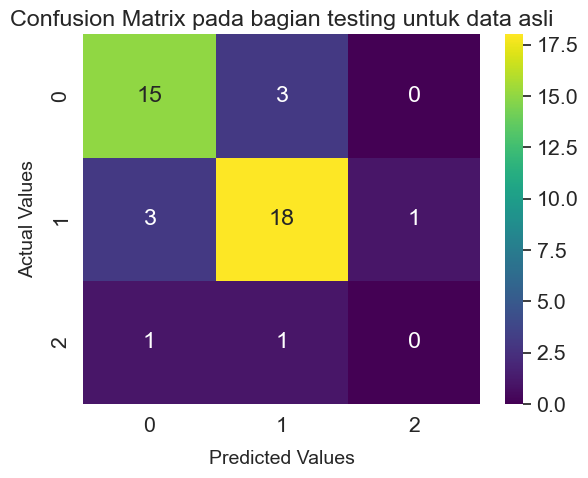

In [43]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()